# Introduction to neural network classification with TensorFlow

A classification is where you try yo classify something as on thing or another.

A few types of classification problems:

* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 10000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03,
                    random_state=42)

In [2]:
# Check the features
X

array([[ 0.0464692 ,  0.82477834],
       [ 1.00506323, -0.43335153],
       [-0.58348442,  0.79452834],
       ...,
       [ 0.6854581 ,  0.37297955],
       [ 0.47440334,  0.88491997],
       [-0.67440999,  0.26094865]])

In [3]:
# Check the labels
y

array([1, 0, 0, ..., 1, 0, 1])

The data is a little hard to understand right now... let´s visualize it.

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.046469,0.824778,1
1,1.005063,-0.433352,0
2,-0.583484,0.794528,0
3,0.984783,-0.325179,0
4,0.829930,-0.547223,0
...,...,...,...
9995,0.505764,0.662722,1
9996,0.790650,0.218306,1
9997,0.685458,0.372980,1
9998,0.474403,0.884920,0


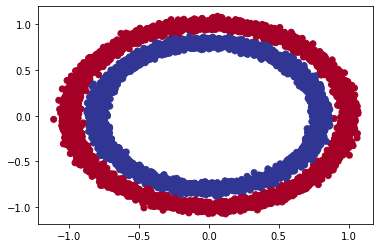

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [6]:
# Check the shape of our features and labels
X.shape, y.shape

((10000, 2), (10000,))

In [7]:
X[:10], y[:10]

(array([[ 0.0464692 ,  0.82477834],
        [ 1.00506323, -0.43335153],
        [-0.58348442,  0.79452834],
        [ 0.98478298, -0.32517879],
        [ 0.82993028, -0.54722305],
        [-0.13392877,  0.77624858],
        [ 0.77919743,  0.64581132],
        [ 0.72295477,  0.17383084],
        [-0.12180665,  0.79695076],
        [ 0.84952936,  0.50567829]]), array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0]))

In [8]:
# How many samples we're working with
len(X), len(y)

(10000, 10000)

In [9]:
# View the first example of features and labels
X[10], y[10]

(array([-0.92287711, -0.31288882]), 0)

## Steps in modelling
First try

In [10]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
)
len(X), len(X_train), len(X_test)

(10000, 8000, 2000)

In [11]:
import tensorflow as tf

# Build a neural network to fit the data
tf.random.set_seed(42)

# 1. Create a model
callback = tf.keras.callbacks.EarlyStopping(monitor="accuracy", mode="min", patience=10)
first_model = tf.keras.Sequential([
  tf.keras.Input(shape = 2),
  tf.keras.layers.Dense(100, activation = "relu"),
  #tf.keras.layers.Dense(100),
  #tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1, activation="sigmoid"),
])

# 2. Compile the model
first_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
              metrics=["accuracy"])

# 3. Fit the model
history = first_model.fit(X_train, y_train, 
                          #X, y,
                          epochs=10000, callbacks=[callback])

# 4. Evaluate the model
first_model.evaluate(X_test, y_test)

Epoch 1/10000
250/250 [==============================] - 2s 3ms/step - loss: 0.6949 - accuracy: 0.4976
Epoch 2/10000
250/250 [==============================] - 1s 3ms/step - loss: 0.6863 - accuracy: 0.4974
Epoch 3/10000
250/250 [==============================] - 1s 3ms/step - loss: 0.6789 - accuracy: 0.5045
Epoch 4/10000
250/250 [==============================] - 1s 3ms/step - loss: 0.6699 - accuracy: 0.5665
Epoch 5/10000
250/250 [==============================] - 1s 3ms/step - loss: 0.6591 - accuracy: 0.7505
Epoch 6/10000
250/250 [==============================] - 1s 3ms/step - loss: 0.6468 - accuracy: 0.8911
Epoch 7/10000
250/250 [==============================] - 1s 4ms/step - loss: 0.6333 - accuracy: 0.9345
Epoch 8/10000
250/250 [==============================] - 1s 3ms/step - loss: 0.6191 - accuracy: 0.9621
Epoch 9/10000
250/250 [==============================] - 1s 3ms/step - loss: 0.6037 - accuracy: 0.9799
Epoch 10/10000
250/250 [==============================] - 1s 3ms/step - l

[0.5448473691940308, 0.9990000128746033]

Text(0.5, 0, 'epochs')

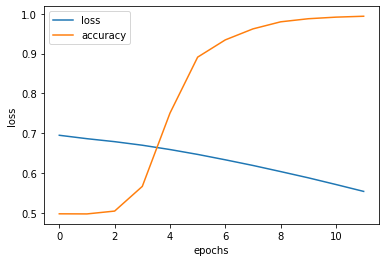

In [12]:
# Plot history
import pandas as pd
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [13]:
# Save the model
first_model.save("binary_classification_model.h5")

In [14]:
# Download the model from Google Colab
from google.colab import files
files.download("/content/binary_classification_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [15]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model 
model_2.fit(X, y,epochs=5)

Epoch 1/5
313/313 [==============================] - 2s 3ms/step - loss: 0.8730 - accuracy: 0.4962
Epoch 2/5
313/313 [==============================] - 1s 3ms/step - loss: 0.6938 - accuracy: 0.4964
Epoch 3/5
313/313 [==============================] - 1s 3ms/step - loss: 0.6939 - accuracy: 0.4960
Epoch 4/5
313/313 [==============================] - 1s 3ms/step - loss: 0.6938 - accuracy: 0.5015
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.6938 - accuracy: 0.4997


In [16]:
# Lets try and improve our model by training for longer..
model_2.fit(X, y, epochs=200)
model_2.evaluate(X, y)

Epoch 1/200
313/313 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.4958
Epoch 2/200
313/313 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4954
Epoch 3/200
313/313 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.4960
Epoch 4/200
313/313 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.5015
Epoch 5/200
313/313 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4997
Epoch 6/200
313/313 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.4953
Epoch 7/200
313/313 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.4883
Epoch 8/200
313/313 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4974
Epoch 9/200
313/313 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.4977
Epoch 10/200
313/313 [==============================] - 0s 1ms/step - loss: 0.6940 - accura

[0.6936948299407959, 0.5004000067710876]

Since we're working on a binary classification problem and our model is getting around 50% accuaracy... it's performing as it's guessing 🇸

Try to add an extra layer?

In [17]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model, with 2 layers
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100)

Epoch 1/100
313/313 [==============================] - 2s 3ms/step - loss: 0.7659 - accuracy: 0.5057
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6952 - accuracy: 0.4978
Epoch 3/100
313/313 [==============================] - 1s 3ms/step - loss: 0.6942 - accuracy: 0.4989
Epoch 4/100
313/313 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.5024
Epoch 5/100
313/313 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5007
Epoch 6/100
313/313 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5011
Epoch 7/100
313/313 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4919
Epoch 8/100
313/313 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.4893
Epoch 9/100
313/313 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5031
Epoch 10/100
313/313 [==============================] - 0s 1ms/step - loss: 0.6937 - accura

In [18]:
# 4. Evaluate the model(ON THE SAME DATA WE TRAINED ON, BIG NO-NO)
model_3.evaluate(X, y)

313/313 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932647824287415, 0.5]

In [19]:
# There are 5K of each color, not that good neural network :P
circles["label"].value_counts()

1    5000
0    5000
Name: label, dtype: int64

## Improving our model

1. Create a model - more layers and hidden units
2. Compile a model - choose a diffirent optimization function
3. Fitting a model - more epochs

## Common ways to improve a deep model:
* Adding layers
* Increase the number of hidden units
* Change the activation functions
* Change the optimization function
* Change the learning rate
* Fitting on more data
* Fitting for longer

In [20]:
# Set random seed
tf.random.set_seed(42)

# 1. Create te model
model_4 =  tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                               
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]    
)

# 3. Fit the model
model_4.fit(X, y, epochs=100)

Epoch 1/100
313/313 [==============================] - 1s 2ms/step - loss: 0.9536 - accuracy: 0.4919
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6949 - accuracy: 0.5005
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6948 - accuracy: 0.4941
Epoch 4/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6966 - accuracy: 0.4923
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6965 - accuracy: 0.5028
Epoch 6/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6960 - accuracy: 0.4941
Epoch 7/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6970 - accuracy: 0.4926
Epoch 8/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6969 - accuracy: 0.4978
Epoch 9/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6962 - accuracy: 0.5006
Epoch 10/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6969 - accura

In [21]:
# 4. Evaluate the model, NOT IDEAL TO EVALUATE ON THE SAME DATASET WE'RE TRAINING ON.. :P
model_4.evaluate(X, y)

313/313 [==============================] - 1s 1ms/step - loss: 0.6934 - accuracy: 0.5000


[0.6934003829956055, 0.5]